### Hillslope mesh generation script
This script generates hillslope mesh (see mesh_generation.ipynb) with varying top organic layer, where bottom boundary of the organic layer is defined by 'org_layer_bottom_bndry'. 

EJ 02/22/19 

In [1]:
import sys,os

sys.path.append(os.path.join(os.environ['ATS_DEV'],'tools','meshing_ats'))
import meshing_ats

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class extrude_layer:
    """Class properties """
    layer_types = []
    layer_data = []
    layer_ncells = []
    layer_mat_ids = []
    layer_depth = []

    def extrude(self):
        self.layer_types = []
        self.layer_data = []
        self.layer_ncells = []
        self.layer_mat_ids = []
        self.layer_depth = []
        dz = .01
        l_dz=0
        i=0 
        while (l_dz<2): # for depth less than 2m
            if i<=20:            #organic
                dz *= 1.2
            elif (20<i)&(i<=26): #mineral
                dz *= 1.4
            else:                #mineral
                dz *= 1.5          
            self.layer_types.append("constant")
            self.layer_data.append(dz)
            self.layer_ncells.append(1)
            l_dz=dz+l_dz
            self.layer_depth.append(l_dz)
            i += 1

        while (l_dz<42): # stop when depth gets deeper than 42m
            dz = 2    
            self.layer_types.append("constant")
            self.layer_data.append(dz)
            self.layer_ncells.append(1)
            l_dz=dz+l_dz
            self.layer_depth.append(l_dz)

        num_of_layers=len(self.layer_data)    
        self.layer_types.append('constant')
        self.layer_data.append(44 - sum(self.layer_data))
        self.layer_ncells.append(1)
        self.layer_depth.append(44)
        
        return

# of x and z elemets:  101 ,  101
# of cells:  100


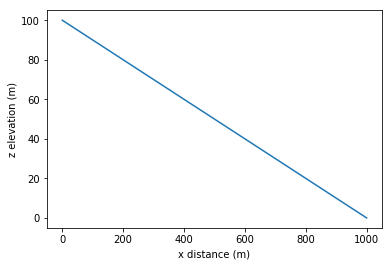

In [3]:
# 1 km long hillslope, 10% slope
x = np.linspace(0,1000,101)
z = np.linspace(100,0,101)
#print x, z
print '# of x and z elemets: ',len(x),', ',len(z)
plt.plot(x,z); plt.xlabel('x distance (m)'); plt.ylabel('z elevation (m)')
m2 = meshing_ats.Mesh2D.from_Transect(x,z)
print '# of cells: ', m2.num_cells()

Below there are 3 similar functions which return organic layer thickness parameter. For 2 functions produce varying organic layer, the 3 one is a constant layer

In [ ]:
#Changing organic layer thickness: original (max depth 50 cm)
def org_layer_bottom_bndry(s):
    if s<100:
        thickness=0.5
    elif ((100<=s)&(s<=200)):
        thickness=-0.0045*s+0.95
    elif ((200<s)&(s<800)):
        thickness=0.05
    elif ((800<=s)&(s<=900)):
        thickness=0.0025*s-1.95
    else:
        thickness=0.3
    return thickness

In [ ]:
#Changing organic layer thickness: deep (max depth 1m)
def org_layer_bottom_bndry(s):
    if s<100:
        thickness=1
    elif ((100<=s)&(s<=200)):
        thickness=-0.0095*s+1.95
    elif ((200<s)&(s<800)):
        thickness=0.05
    elif ((800<=s)&(s<=900)):
        thickness=0.0055*s-4.35
    else:
        thickness=0.6
    return thickness

In [4]:
#Const organic layer thickness: const  
def org_layer_bottom_bndry(s):
    return 0.10

# of nodes: 202 (202,)


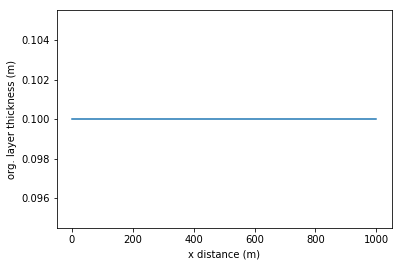

In [5]:
dzs_org_layer = np.array([org_layer_bottom_bndry(zz) for zz in m2.coords[:,0]])
print '# of nodes:', len(dzs_org_layer), np.shape(dzs_org_layer)
plt.plot(x, dzs_org_layer[0:101]); plt.xlabel('x distance (m)'); plt.ylabel('org. layer thickness (m)');
#print dzs_org_layer[0:101]
#print len(dzs_org_layer[0:101])

### Make subsurface layers [layer_depth].

Two exmaples below show cases with different vertical spacing. Finer depth resolution might matter when dealing with deep subsurface groundwater flow.

In [ ]:
# preparing layer extrusion data for meshing_ats
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []
layer_depth = []

dz = .01
l_dz=0
for i in range(30):
    if i<=20:            #organic
        dz *= 1.2
    elif (20<i)&(i<=26): #mineral
        dz *= 1.4
    else:                #bedrock
        dz *= 1.5          
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    l_dz=dz+l_dz
    layer_depth.append(l_dz)

num_of_layers=len(layer_data)    
layer_types.append('constant')
layer_data.append(45 - sum(layer_data))
layer_ncells.append(1)
layer_depth.append(45)

print 'make sure that the length of all layer data are the same'
print len(layer_data),len(layer_ncells), len(layer_depth)
print num_of_layers
print layer_depth
plt.plot(layer_depth,'s'); plt.xlabel('# cells'); plt.ylabel('depth');

make sure that the length of all layer data are the same
41 41 41
[0.012, 0.0264, 0.04368, 0.064416, 0.0892992, 0.11915904, 0.154990848, 0.19798901759999998, 0.24958682111999997, 0.31150418534399993, 0.3858050224127999, 0.4749660268953599, 0.5819592322744318, 0.7103510787293181, 0.8644212944751818, 1.049305553370218, 1.2711666640442616, 1.537399996853114, 1.8568799962237368, 2.240255995468484, 4.240255995468484, 6.240255995468484, 8.240255995468484, 10.240255995468484, 12.240255995468484, 14.240255995468484, 16.240255995468484, 18.240255995468484, 20.240255995468484, 22.240255995468484, 24.240255995468484, 26.240255995468484, 28.240255995468484, 30.240255995468484, 32.24025599546849, 34.24025599546849, 36.24025599546849, 38.24025599546849, 40.24025599546849, 42.24025599546849, 44]


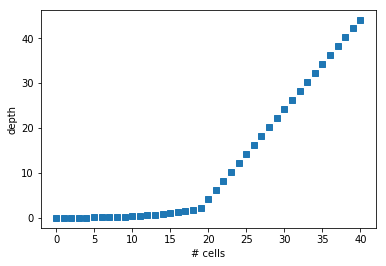

In [6]:
# preparing layer extrusion data for meshing_ats
ex=extrude_layer()
ex.extrude()

print 'make sure that the length of all layer data are the same'
print len(ex.layer_data),len(ex.layer_ncells), len(ex.layer_depth)
print ex.layer_depth
plt.plot(ex.layer_depth,'s'); plt.xlabel('# cells'); plt.ylabel('depth');

### Marking cells by numbers correspoding to the subsurfae material. (peat/mineral/rock)

In [7]:
# allocate 2D matrix with cols=#cells, rows=21
# here is 21 is the bottom depth of the mineral layer
nlayer=len(ex.layer_data)
mat_ids=np.zeros((m2.num_cells(), 21))
for i in range(m2.num_cells()):
    for j in range(21): # after layer 20 everything is bedrock
        if (ex.layer_depth[j]<dzs_org_layer[i]):
        #if (ex.layer_depth[j]<0.5):  # constant OLT=50cm
            mat_ids[i,j]=1001
        else:
            mat_ids[i,j]=1002
            
# filling out layer_mat_ids
layer_mat_ids = []
for j in range(21):
    ex.layer_mat_ids.append(mat_ids[:,j])
for j in range(21,nlayer):
    ex.layer_mat_ids.append(101*np.ones((100,)))

print '# of rows, # of cells:', np.shape(ex.layer_mat_ids)

# of rows, # of cells: (41, 100)


### Make 3D exodus mesh

In [9]:
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, ex.layer_types,ex.layer_data, ex.layer_ncells, ex.layer_mat_ids)
m3.write_exodus("hillslope_2D_1.exo")


You are using exodus.py v 1.04 (beta-cmake), a python wrapper of some of the exodus II library.
Copyright (c) 2013, 2014, 2015, 2016 Sandia Corporation. Under the terms of Contract DE-AC04-94AL85000
with Sandia Corporation, the U.S. Government retains certain rights in this software.

Opening exodus file: hillslope_2D_1.exo
Closing exodus file: hillslope_2D_1.exo


### Example for 1D column mesh column

In [3]:
x = np.array([0,1])
z = np.array([0,0])

ex=extrude_layer()
ex.extrude()

print 'make sure that the length of all layer data are the same'
print len(ex.layer_data),len(ex.layer_ncells), len(ex.layer_depth)

nlayer=len(ex.layer_data)
mat_ids=np.zeros(21)
    
for j in range(21): # after layer 20 everything is bedrock
    if (ex.layer_depth[j]<0.10):  # constant OLT=50cm
        mat_ids[j]=1001
    else:
        mat_ids[j]=1002        
            
# filling out layer_mat_ids
for j in range(21):
    ex.layer_mat_ids.append(mat_ids[j])
for j in range(21,nlayer):
    ex.layer_mat_ids.append(101)

print 'layer_mat_ids'
print len(ex.layer_mat_ids)

m2 = meshing_ats.Mesh2D.from_Transect(x,z)

m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, ex.layer_types, ex.layer_data, ex.layer_ncells, ex.layer_mat_ids)
m3.write_exodus("hillslope_column_10cm.exo")

make sure that the length of all layer data are the same
41 41 41
layer_mat_ids
41

You are using exodus.py v 1.04 (beta-cmake), a python wrapper of some of the exodus II library.
Copyright (c) 2013, 2014, 2015, 2016 Sandia Corporation. Under the terms of Contract DE-AC04-94AL85000
with Sandia Corporation, the U.S. Government retains certain rights in this software.

Opening exodus file: hillslope_column_10cm.exo
Closing exodus file: hillslope_column_10cm.exo
